# **Implementacion de regresión lineal sin framework**

Michelle Yareni Morales Ramón A01552627


In [1]:
import pandas as pd

**Importar datos**

Para esta implementación se hizo uso del dataset 'CO2 emissions by vehicles',

Base en kaggle: https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles  

Base en el repositorio: https://github.com/michelle-morales/Portafolio-implementacion-IA-1/blob/main/co2_prueba.csv

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df=pd.read_csv('/content/gdrive/MyDrive/IA_concentracion/co2_prueba.csv')

**Descripción del problema**

Este problema implica modelar una relación entre una variable que se quiere predecir, que en este caso es la cantidad de emisiones de CO2 que genera un auto, y alguna variable que influya en ella. Para ello se decidió implementar la técnica de regresión lineal, que busca establecer una ecuación lineal para mejorar el ajuste a los datos y que de esta manera se puedan realizar predicciones o estimaciones.

In [4]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


**Descripción de los datos**

Número de registros: 7385

Total de variables: 12

Cantidad de variables categóricas: 5

Cantidad de variables numéricas: 7

**Variables usadas para implementar la regresión**

Como se trata de una regresión lienal simple se escogieron únicamente dos variables, la predictora y la de salida.

Variable independiente: 'Fuel Consumption Comb (mpg)'. Valores entre 11 y 69.

Variable dependiente: 'CO2 Emissions(g/km)'. Esta es la variable de salida y toma valores entre 96 y 522.

In [5]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


**Parametros iniciales**

Se probaron distintos valores para los parámetros iniciales pero se elegieron los siguientes, ya que estos reducían el error.

tetha 0 = 400

tetha 1 = -5

alpha = 0.001

iteraciones = 1000


Se tomaron la mitad de los datos para el conjunto de Train y la otra mitad para el Test.

In [6]:
#parametros iniciales

#tetha
t=[400,-5]

#division de train y test
mitad=len(df)//2

#train
x_train = df['Fuel Consumption Comb (mpg)'].head(mitad)
y_train = df['CO2 Emissions(g/km)'].head(mitad)
#test
x_test = df['Fuel Consumption Comb (mpg)'].tail(mitad)
y_test = df['CO2 Emissions(g/km)'].tail(mitad)

#alpha
a=0.001

#numero de iteraciones
it=1000

In [7]:
# Crear función lambda para la función de hipótesis
h = lambda X,t: t[0]+t[1]*X
# Calcular el total de muestras a partir de los datos (n)
n = len(x_train)

In [8]:
for i in range(it):
  delta = []
  delta_xi = []

  for xi, yi in zip(x_train, y_train):
      pred = h(xi, t)  # Predicción
      # Calcular delta para theta0 y para cada muestra
      delta.append(pred - yi)
      # Calcular delta para theta1 y para cada muestra
      delta_xi.append((pred - yi) * xi)

  # Calcular sumatorias y promedio
  djt0 = sum(delta) / n
  djt1 = sum(delta_xi) / n

  #actualizacion dj
  dj = [djt0, djt1]

  #actualizacion de tetha
  for i in range(len(t)):
    t[i]=t[i]-a*dj[i]

#tetha final
print('Las tethas finales fueron:', t)

Las tethas finales fueron: [403.46219751825885, -5.73430307716706]


**Predicción con un dato nuevo para probar el modelo**

In [11]:
#fcc=[50]
#pred = h(fcc, t)
#print('La predicción de la emisión de CO2 es de: ', pred)
# Valores de x para hacer predicciones
x1 = 20
x2 = 35
x3 = 50

# Hacer predicciones
prediccion_x1 = h(x1, t)  # Predicción para x1
prediccion_x2 = h(x2, t)   # Predicción para x2
prediccion_x3 = h(x3, t)   # Predicción para x3

print(f'Predicción para x1 = {x1}: {prediccion_x1}')
print(f'Predicción para x2 = {x2}: {prediccion_x2}')
print(f'Predicción para x3 = {x3}: {prediccion_x3}')

Predicción para x1 = 20: 288.7761359749177
Predicción para x2 = 35: 202.76158981741176
Predicción para x3 = 50: 116.74704365990584


**Evaluación del desempeño del modelo**

En este caso se usaron el MSE, MAE y R2 como métricas de desempeño, ya que se trata de una regresión lineal y lo que se busca evaluar es el error.

**Predicciones en el conjunto Train**

In [12]:
#evaluación del conjunto train

# predicciones
p_train=[]

# Barrer la entrada y estimar las salidas:
for xi in x_train:
  # Usar función de hipótesis
  pred = h(xi, t)
  p_train.append(pred)

**Predicciones en el conjunto Test**

In [13]:
#evaluación del conjunto test

# predicciones
p_test=[]

# Barrer la entrada y estimar las salidas:
for xi in x_test:
  # Usar función de hipótesis
  pred = h(xi, t)
  p_test.append(pred)


In [14]:
def mean_squared_error(y_true, y_pred):
    n = len(y_true)
    mse = sum((y_true - y_pred) ** 2) / n
    return mse

mse_train = mean_squared_error(y_train, p_train)
print("MSE del conjunto Train:", mse_train)

mse_test = mean_squared_error(y_test, p_test)
print("MSE del conjunto Test:", mse_test)

MSE del conjunto Train: 803.778577841749
MSE del conjunto Test: 718.6326861483204


In [15]:
def mean_absolute_error(y_true, y_pred):
    n = len(y_true)
    mae = sum(abs(y_true - y_pred)) / n
    return mae

mae_train = mean_absolute_error(y_train, p_train)
print("MAE del conjunto Train:", mae_train)

mae_test = mean_absolute_error(y_test, p_test)
print("MAE del conjunto Test:", mae_test)

MAE del conjunto Train: 19.983843612679948
MAE del conjunto Test: 18.235396426073997


In [16]:
def r_squared(y_true, y_pred):
    y_mean = sum(y_true) / len(y_true)
    ss_total = sum((y_true - y_mean) ** 2)
    ss_res = sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_res / ss_total)
    return r2

r2_train = r_squared(y_train, p_train)
print("R2 del conjunto Train:", r2_train)

r2_test = r_squared(y_test, p_test)
print("R2 del conjunto Test:", r2_test)

R2 del conjunto Train: 0.7697234461850996
R2 del conjunto Test: 0.785791708860373


**Score en el subconjunto de entrenamiento**

MSE = 803.78

MAE = 19.98

R2 = 0.77

**Score en el subconjunto de prueba**

MSE = 718.63

MAE = 18.23

R2 = 0.79




**Grafica de predicciones y valores reales**

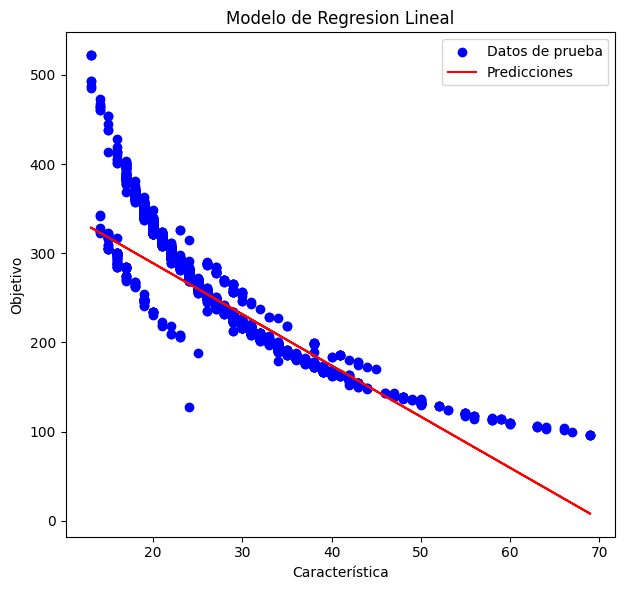

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.scatter(x_test, y_test, label='Datos de prueba', color='b')
plt.plot(x_test, p_test, label='Predicciones', color='r')
plt.xlabel('Característica')
plt.ylabel('Objetivo')
plt.title('Modelo de Regresion Lineal')
plt.legend()

plt.tight_layout()
plt.show()

**Conclusiones**

Tanto en el conjunto de prueba como en el de entrenamiento los errores son bastante grandes considerando que la variable de salida se encuentra en un rango de 96 - 522. Esto quiere decir que el modelo no se esta ajustando correctamente a los datos, pero es posible que al aumentar el grado de la regresión mejore el modelo.